In [1]:
%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [10]:
#inspect to view existing columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


# Exploratory Climate Analysis

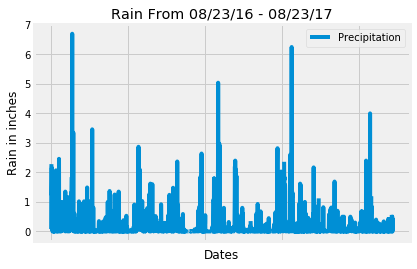

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_date_precip = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
a_year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the date and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > a_year_ago).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(precip_scores)
rain_df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot("date", "prcp")
plt.ylabel("Rain in inches")
plt.xlabel("Dates")
plt.title("Rain From 08/23/16 - 08/23/17")
plt.legend(["Precipitation"], loc = "best")

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).count()
print(f"There are {stations} stations.")

There are 9 stations.


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).distinct().all()
most_active_station = station_count[0][0]
print(f"The most active station was {most_active_station} with a count of {station_count[0][1]}")
print("------------------------------------------------------")
for station, count in station_count:
    print(f"{station} has a count of {count}")

The most active station was USC00519281 with a count of 2772
------------------------------------------------------
USC00519281 has a count of 2772
USC00519397 has a count of 2724
USC00513117 has a count of 2709
USC00519523 has a count of 2669
USC00516128 has a count of 2612
USC00514830 has a count of 2202
USC00511918 has a count of 1979
USC00517948 has a count of 1372
USC00518838 has a count of 511


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_details = session.query(Measurement.station, func.count(Measurement.id), func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).distinct().all()
for station, count, min, max, avg in temp_details:
    print(f"{station} has a count of {count} stations with a min temp of {min}, a max temp of {max}, and an avg temp of {avg}")

USC00519281 has a count of 2772 stations with a min temp of 54.0, a max temp of 85.0, and an avg temp of 71.66378066378067
USC00519397 has a count of 2724 stations with a min temp of 56.0, a max temp of 87.0, and an avg temp of 74.55323054331865
USC00513117 has a count of 2709 stations with a min temp of 59.0, a max temp of 85.0, and an avg temp of 72.68918420081211
USC00519523 has a count of 2669 stations with a min temp of 56.0, a max temp of 85.0, and an avg temp of 74.5436493068565
USC00516128 has a count of 2612 stations with a min temp of 58.0, a max temp of 84.0, and an avg temp of 70.91500765696784
USC00514830 has a count of 2202 stations with a min temp of 58.0, a max temp of 85.0, and an avg temp of 74.8732970027248
USC00511918 has a count of 1979 stations with a min temp of 53.0, a max temp of 87.0, and an avg temp of 71.61596766043456
USC00517948 has a count of 1372 stations with a min temp of 58.0, a max temp of 87.0, and an avg temp of 74.68440233236151
USC00518838 has a 

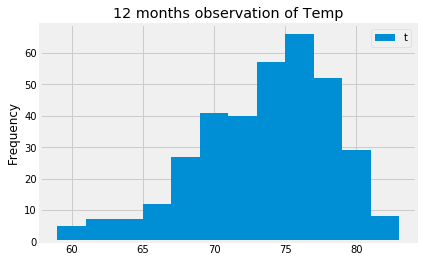

<Figure size 72x72 with 0 Axes>

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_his_last_12_months = session.query(Measurement.tobs, Measurement.station).filter(Measurement.date > a_year_ago).filter(Measurement.station == "USC00519281").order_by(Measurement.date).all()
temp_df = pd.DataFrame(temp_his_last_12_months)
plt.hist(temp_df['tobs'],12)
plt.ylabel("Frequency")
plt.title("12 months observation of Temp")
plt.legend("tobs")
plt.figure(figsize=(1,1))
plt.show()

In [17]:
#OPTIONAL FROM THIS POINT
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_arrive = dt.date(2011,10,3)
trip_leave = dt.date(2011,10,23)
last_year = dt.timedelta(days = 365)
trip_arrive_last_year = trip_arrive - last_year
trip_leave_last_year = trip_leave - last_year
avg_last_year = calc_temps(trip_arrive_last_year, trip_leave_last_year)
print(avg_last_year)

[(65.0, 74.8224852071006, 84.0)]


Text(0, 0.5, 'Avg Temperature')

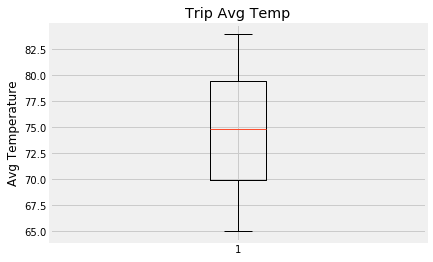

In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.boxplot(avg_last_year)
plt.title("Trip Avg Temp")
plt.ylabel("Avg Temperature")